In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as fmr
import FMR_Evaluator_v210208 as eva

import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

#help(FMR_Reader)

no style found


In [2]:
dataset='BF Cobulky32nm FAST'
d=fmr.read(dataset,loc='../../../messungen/')

100%|██████████| 2401/2401 [01:12<00:00, 32.98it/s]


In [3]:
d

{'version': 'version from 20210322',
 'T_sample(H)': array([    nan,     nan,     nan, ..., 3.99239, 3.98973, 3.99174]),
 'f': array([ 2.  ,  2.02,  2.04, ..., 26.96, 26.98, 27.  ]),
 'H': array([-0.6   , -0.5995, -0.599 , ...,  0.599 ,  0.5995,  0.6   ]),
 'S21': array([[ 0.42867389+1.78687681e-01j,  0.42865198+1.78694375e-01j,
          0.42862847+1.78701489e-01j, ...,  0.42865724+1.78397955e-01j,
          0.42867779+1.78383729e-01j,  0.42870616+1.78371299e-01j],
        [-0.09211718+4.73193668e-01j, -0.09213887+4.73173326e-01j,
         -0.09214568+4.73150261e-01j, ..., -0.0918582 +4.73120315e-01j,
         -0.09183509+4.73141710e-01j, -0.09181278+4.73152355e-01j],
        [-0.48945331+3.70850754e-04j, -0.48942315+3.50494542e-04j,
         -0.48939875+3.45149996e-04j, ..., -0.48932062+6.32470811e-04j,
         -0.48933731+6.53084480e-04j, -0.48935059+6.74902123e-04j],
        ...,
        [ 0.00957726-2.56261020e-02j,  0.00958269-2.56234184e-02j,
          0.00957712-2.56179998e-02

In [4]:
db=eva.complex_binning(d,Hmin=-.15, Hmax=.55)

In [5]:
dn=eva.normS21(db)

In [6]:
dn

{'H': array([-0.15  , -0.1495, -0.149 , ...,  0.549 ,  0.5495,  0.55  ]),
 'Hnorm': array([[0.55]]),
 'S21': array([[0.99974434+5.39520007e-04j, 0.99971634+5.24967122e-04j,
         0.99968895+5.58681941e-04j, ..., 0.99984329+7.72442604e-05j,
         0.99990787+3.46843307e-05j, 1.        -5.55111512e-17j],
        [0.99970926+5.70892177e-04j, 0.99970251+5.54388559e-04j,
         0.9996695 +5.62222919e-04j, ..., 0.99985464+8.53794320e-05j,
         0.99992491+5.03506696e-05j, 1.        -2.77555756e-17j],
        [0.99972069+5.23832664e-04j, 0.99969218+5.31840518e-04j,
         0.99966495+5.16852570e-04j, ..., 0.99986394+5.59503046e-05j,
         0.99992821+2.86766971e-05j, 1.        -1.00397121e-16j],
        ...,
        [0.99954609+1.51496545e-02j, 0.99948266+1.52397639e-02j,
         0.99927071+1.53169562e-02j, ..., 0.99941371+1.17889075e-03j,
         0.99971541+6.67105829e-04j, 1.        +5.55111512e-17j],
        [0.99877104+1.43289924e-02j, 0.99877591+1.43307188e-02j,
         0

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<Figure size 1800x1080 with 0 Axes>

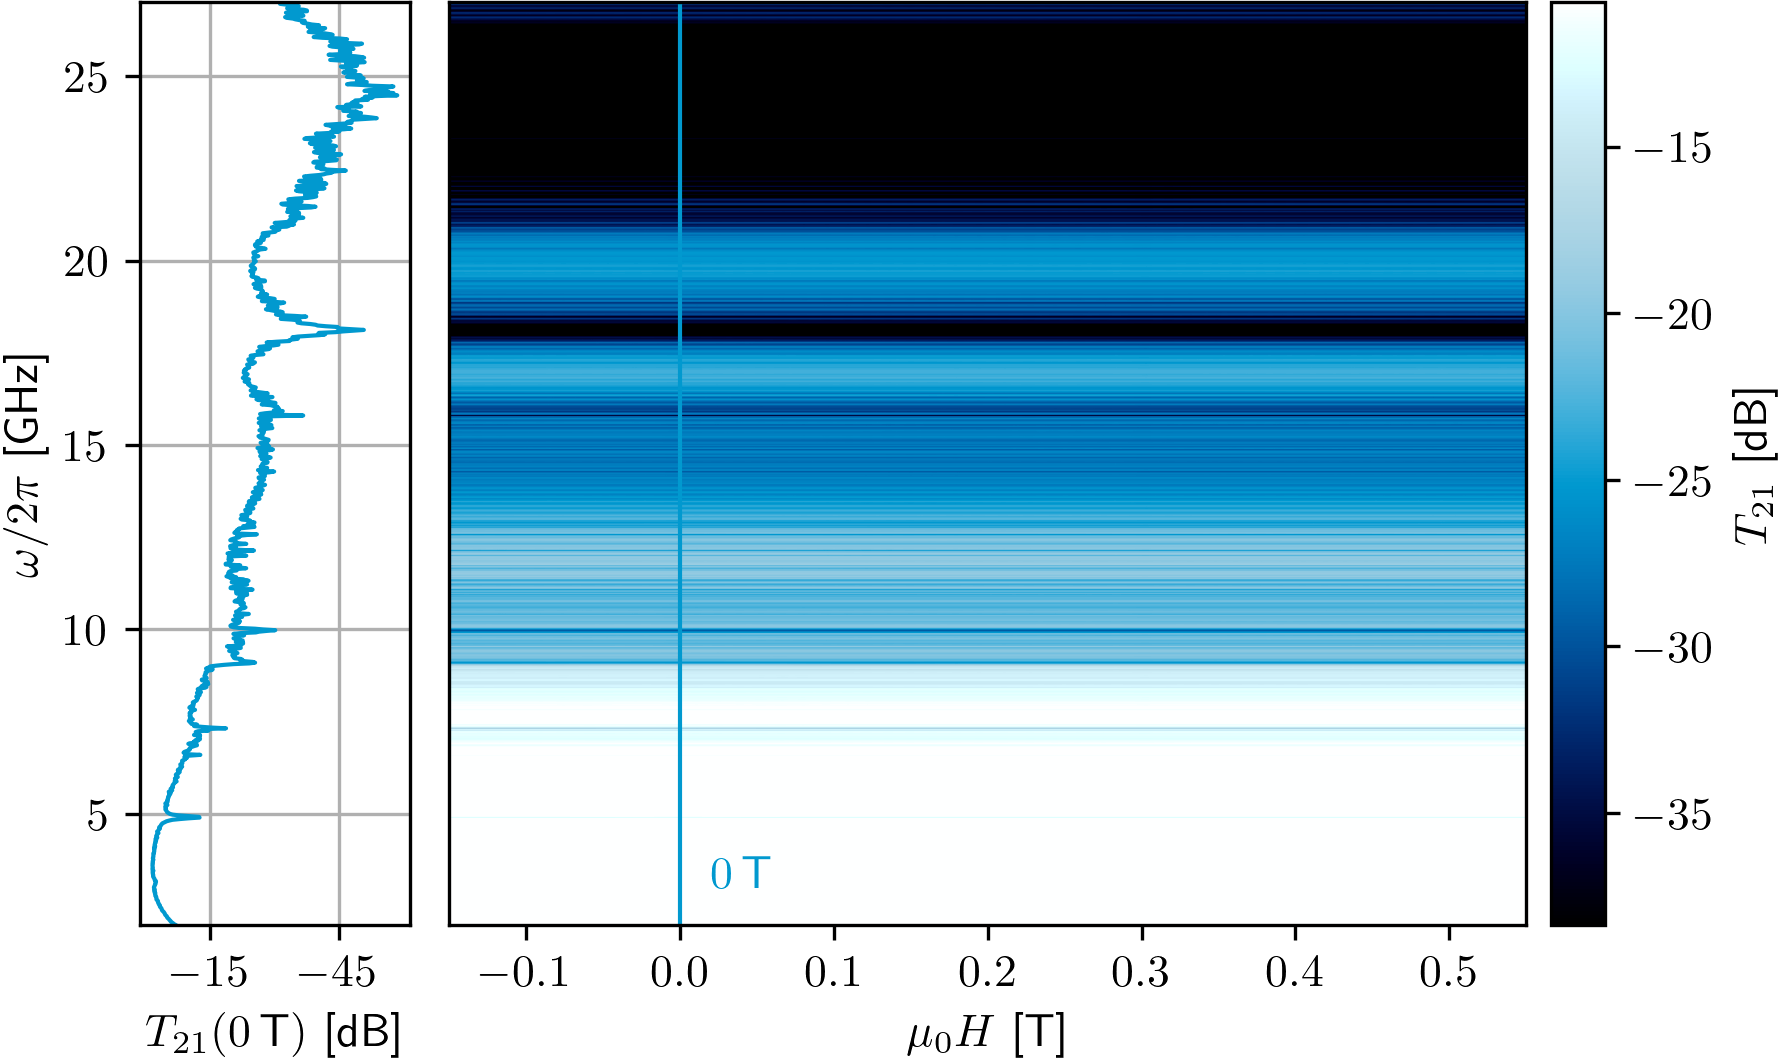

In [7]:
img=20*np.log10(np.abs(db['S21']))
norm=20*np.log10(np.abs(db['S21'][:,np.argmin(np.abs(db['H']))]))
posN=db['H'][np.argmin(np.abs(db['H']))]
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
ax_img.vlines(posN, ymin=ext[2], ymax=ext[3],
              color=cpd.curves()(0.48))
ax_img.text(0+.02,3,'$0\,$T',
              color=cpd.images()(0.48))

ax_img.set_xticks(np.linspace(-.1,.5,7))

fig.colorbar(im,label=clabel, cax=ax_clb)

#fig.execute_constrained_layout()
fig.savefig('small_signal.pgf')

In [8]:
db=eva.complex_binning(d,Hmin=-.15, Hmax=.55)
dn=eva.normS21(db)
dn

{'H': array([-0.15  , -0.1495, -0.149 , ...,  0.549 ,  0.5495,  0.55  ]),
 'Hnorm': array([[0.55]]),
 'S21': array([[0.99974434+5.39520007e-04j, 0.99971634+5.24967122e-04j,
         0.99968895+5.58681941e-04j, ..., 0.99984329+7.72442604e-05j,
         0.99990787+3.46843307e-05j, 1.        -5.55111512e-17j],
        [0.99970926+5.70892177e-04j, 0.99970251+5.54388559e-04j,
         0.9996695 +5.62222919e-04j, ..., 0.99985464+8.53794320e-05j,
         0.99992491+5.03506696e-05j, 1.        -2.77555756e-17j],
        [0.99972069+5.23832664e-04j, 0.99969218+5.31840518e-04j,
         0.99966495+5.16852570e-04j, ..., 0.99986394+5.59503046e-05j,
         0.99992821+2.86766971e-05j, 1.        -1.00397121e-16j],
        ...,
        [0.99954609+1.51496545e-02j, 0.99948266+1.52397639e-02j,
         0.99927071+1.53169562e-02j, ..., 0.99941371+1.17889075e-03j,
         0.99971541+6.67105829e-04j, 1.        +5.55111512e-17j],
        [0.99877104+1.43289924e-02j, 0.99877591+1.43307188e-02j,
         0

<Figure size 1800x1080 with 0 Axes>

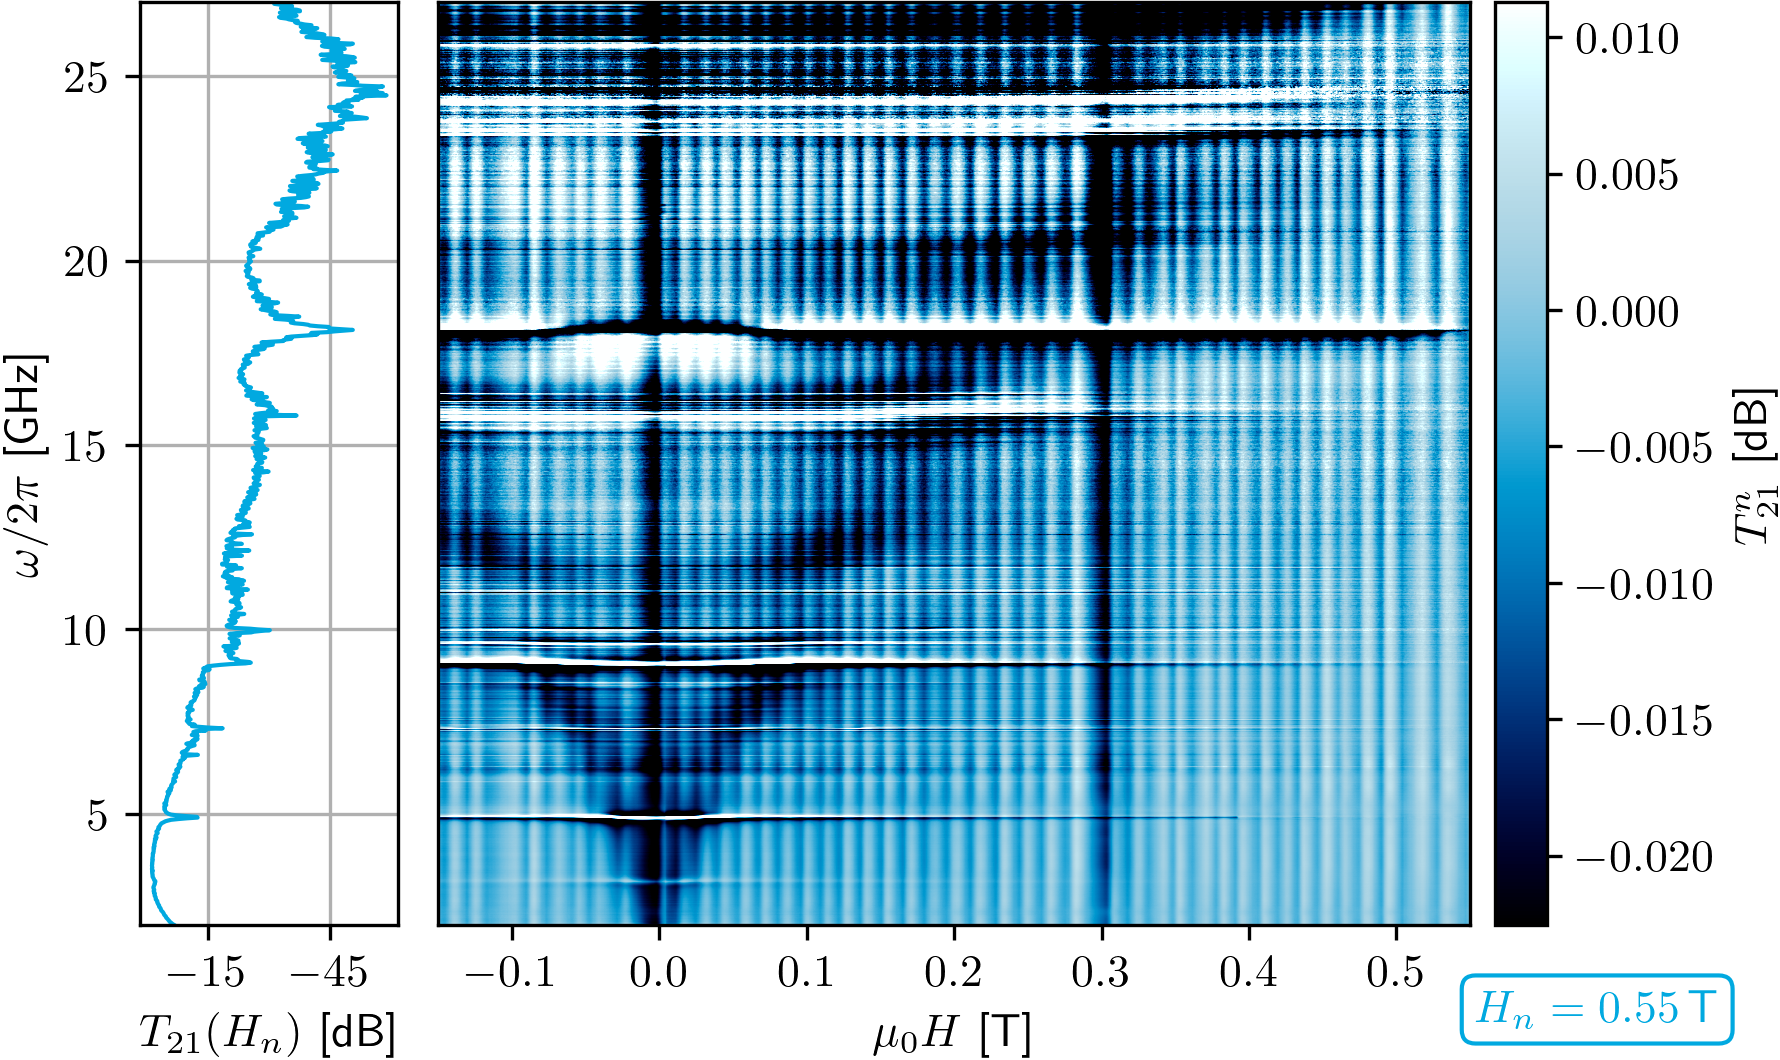

In [12]:
img=20*np.log10(np.abs(dn['S21']))
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(H_n)$ [dB]'
clabel='$T^n_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves(color='seeblau')(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
#ax_img.vlines(posN, ymin=ext[2], ymax=ext[3], lw=2,
#              color=cpd.curves(color='magenta')(1),
#              label="$H_n=%3.2f\,$T"%float(posN))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
#fig.text(.845,.07,
#             "$H_n=%3.2f\,$T"%float(posN),
#             color=cpd.curves(color='seeblau')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='seeblau')(1), 
#                       boxstyle='round'))
ax_clb.set_xticks([0])

fig.text(.825,.045,
            "$H_n=%3.2f\,$t"%float(posN),
            color=cpd.curves(color='seeblau')(1),
            bbox=dict(facecolor='white', 
                      edgecolor=cpd.curves(color='seeblau')(1), 
                      boxstyle='round'))

ax_img.set_xticks(np.linspace(-.1,.5,7))
ax_img.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img.set_xlim(ext[0],ext[1])
ax_img.set_ylim(ext[2],ext[3])


fig.colorbar(im,label=clabel, cax=ax_clb)


#fig.execute_constrained_layout()
fig.savefig('normed_signal.pgf')

In [16]:
20*np.log10(2+1),20*np.log10(2)

(9.542425094393248, 6.020599913279624)